# 08-2. 합성곱 신경망을 사용한 이미지 분류
> 케라스 API를 사용해 합성곱 신경망 모델을 만들어 패션 MNIST 이미지를 분류하는 방법을 배움.

> 텍스트 데이터 다루기

---
알고리즘/ 머신러닝, 딥러닝에 더 알고 싶다면?
> 왜 이런 알고리즘을 썼는지

> 이 알고리즘과 다른 알고리즘은 어떠한 차이가 있는지?

  => 지금 이 수업은 대학으로 치면 '개론', '머신러닝 개론'과 같은 내용으로 간단하게만

In [20]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [21]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [22]:
# 60000개의 데이터를 가져왔다.
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0
# 0에서 1사이의 실수값으로 픽셀을 계산하기 뒤에 마지막에 255.0으로 나눠줌.

# 어제는 flatten층으로 평탄화를 했기 때문에 .reshape을 하진 않았었다.
# .reshape : 우리가 가진 데이터의 모양새를 바꿔줌
# 4차원으로 만들겠다. (괄호 안의 마지막 숫자 1)
# 한장의 종이 (28*28) => 두꺼운 종이로
# (60000, 28, 28) 크기의 3차원 배열 shape 을 (48000, 28, 28, 1) 크기의 4차원 배열로

# 이 이미지 데이터가 색깔이미지를 원하므로 그 데이터의 차원을 바꾼다.

In [23]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target)

In [24]:
# 합성곱 클래스 Conv2D 사용하기

# 모델 먼저 만들기
model = keras.Sequential()

In [25]:
model.add(keras.layers.Conv2D(
    32,
    kernel_size=3,
    activation='relu',
    padding='same',
    input_shape=(28, 28, 1)
))
# 32: 필터의 개수 (아무 숫자); 적은 특성을 찾고 싶다면 조금 더 작은 숫자를 넣어도 됨.
# 3: Kernel_size: 얼마만큼 크기로 이 픽셀들을 묶어서 바라볼거냐 (3*3의 도장)
# activation='relu': 0보다 작으면 버리고 의미있는 애들만 사용하겠다 (렐루 함수)
# padding: 같은 사이즈이 패딩을 추가하겠다.
# input_shape: 우리가 지금 넣어주는 사진의 크기를 의미함 (reshape을 해서 두께감을 줬고, 그걸 마지막 숫자 1을 넣음으로써 3차원으로)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.add(keras.layers.MaxPool2D(2))
# pooling을 하는데 최대값 (max)을 풀링 하겠다.

# 활성화가 제일 많이 되어있는 데이터가 가장 유의미하다.
# 활성화 정도가 높다 = 밝은 이미지가 많이 보인다 (검정색보다는) (p.476)
# 신발 이미지라는게 더 잘 드러나는 상태

In [27]:
model.add(keras.layers.Conv2D(
    64,
    kernel_size=3,
    activation='relu',
    padding='same'
))
model.add(keras.layers.MaxPool2D(2))
# 앞에서 32로 conv2D하고 그걸 한번더 64로 conv2D를 줌
# 두개의 합성곱을 합침

In [28]:
# 학습을 시키기 위해
# 밀집층으로 감싸주자

model.add(keras.layers.Flatten())
# Flatten: 사진을 일관적으로 평탄화 시켜준다.
model.add(keras.layers.Dense(100, activation='relu'))
# Dense: 밀집층을 추가해주자. (100개의 뉴런)
model.add(keras.layers.Dropout(0.4))
# Dropout: 어떤 하나의 특성에 몰입하지 않도록, 뉴런들을 껐다 켜주는 (이 특성을 포함했다가 지웠다가)
model.add(keras.layers.Dense(10, activation='softmax'))
# 여기식은 정해진 데이터 -우리의 데이터가 10개이므로, 구하고 싶은 분류기준이 10개

In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 28, 28, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 14, 14, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 14, 14, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 7, 7, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 3136)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │         313,700 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 333,526 (1.27 MB)

 Trainable params: 333,526 (1.27 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
 # 아까 32 -> 64로 conv2D를 준 내용을 해석해보자면
 # 첫 번째 합성곱 층을 통과하면서 특성 맵의 깊이는 32가 되고, 두 번째 합성곱에서 특성 맵의 크기가 64로 늘어난다. (p. 448)

In [37]:
# compile하고 학습시키자.

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# 학습 방법을 정의해줌

es = keras.callbacks.EarlyStopping(patience=2)
 # es는 조기종료로 epoch를 달성 하지 않더라도, 정확도가 낮아지면 조기 종료해라.
result = model.fit(
     train_scaled,
     train_target,
     validation_data=(val_scaled, val_target),
     callbacks=[es],
     epochs=20
)

Epoch 1/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9463 - loss: 0.1428 - val_accuracy: 0.9213 - val_loss: 0.2423
Epoch 2/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9486 - loss: 0.1345 - val_accuracy: 0.9254 - val_loss: 0.2354
Epoch 3/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9539 - loss: 0.1209 - val_accuracy: 0.9256 - val_loss: 0.2458
Epoch 4/20
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9569 - loss: 0.1135 - val_accuracy: 0.9221 - val_loss: 0.2555


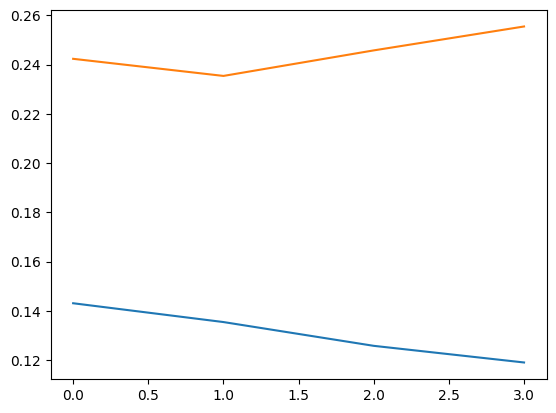

In [39]:
import matplotlib.pyplot as plt
plt.plot(result.history['loss'])
plt.plot(result.history['val_loss'])

In [40]:
model.evaluate(val_scaled, val_target)

469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9225 - loss: 0.2583


[0.25546297430992126, 0.9220666885375977]

In [41]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0
model.evaluate(test_scaled, test_target)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9187 - loss: 0.2749


[0.27390629053115845, 0.9178000092506409]